# Simple Linear Regression

In simple linear regression, we predict continious numerical value. In this, there is only one independent variable or one feature and one dependent variable which takes continious real values.

Here the dataset contains 30 obersations (or 30 samples or 30 rows in the dataset) and 2 columns, one of them is the feature (here, years of experience) and other is the dependent variable (here, salary). Let's say this the data of all the employees of a company. Each row corresponds to an employee.

The goal is to build a simple linear regression model that will be trained to understand the correlations between the number of years of experience (the feature) and the salary (the dependent variable) so that the ML model can predict the salary for a new employee with a given new number of years of experience.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [3]:
print(dataset.shape)

(30, 2)


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# Cheking the missing values.

dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
X = dataset.iloc[:, :-1].values   # Years of experience is the only feature here. Slicing all the rows and all the columns except the last column. In multiple linear regression also, we don't have to change anything here as it will take all the columns except the last column i.e., all the features.
y = dataset.iloc[:, -1].values   # Salary is the dependent variable vector. Slicing all the rows of the last column.

In [7]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [8]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [10]:
print(X_train)
print(X_train.shape)

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
(20, 1)


In [11]:
print(X_test)
print(X_test.shape)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]
(10, 1)


In [12]:
print(y_train)
print(y_train.shape)

[ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]
(20,)


In [13]:
print(y_test)
print(y_test.shape)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]
(10,)


## Training the Simple Linear Regression model on the Training set

Now we will build and train the simple linear regression model on the training set. The training set will be used to train our simple linear regression model and the test set will be used to evaluate the model. We will use **LinearRegression** class from the **sklearn.linear_model** module. Our simple linear regression model will be an instance or object of this class.

In regression, we predict continious real values (e.g., salary). In classification, we predict some category or discrete values.

We know that a class is basically a blueprint or a set of instructions to build something.

The **fit** method train the linear regression model on the training set using $X_{train}$ and $y_{train}$. And the **predict** method will predict the output from the features ($X_{test}$) on the test set which are completely new observations to the model.

The **fit** method takes the matrix of features (X) and the dependent variable vector (y) as the arguments and fit the linear regression model. We will train the linear regression model only for the training set.

The **predict** method or function takes the matrix of features (X) as the argument and returns the predicted values of the dependent variable vector.

In [14]:
# We will use LinearRegression class from the sklearn.linear_model module.
# The fit method takes the matrix of features (X) and the dependent variable vector (y) as the arguments
# and fit the linear regression model. We will train the linear regression model only for the training set.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()   # Creating the Object of the LinearRegression class. This object itself is our simple linear model. Here we just obtained the model. We have not trained the model on the trainin set in this step.
trained_model = regressor.fit(X_train, y_train)   # Here, we connect X_train and y_train i.e., we train the linear regression model on the training set, using the action or function called fit method. The fit method is a method of the LinearRegression class. The fit method train the simple linear regression model on the training set. A class not only have some instruction but also tools which are known as methods. These methods complete some actions like training a model on certain trainin set or predict future results on the test set.

print(trained_model)
print(type(trained_model))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [15]:
# The predicted values or salary for the training set. We will use predict() method or function to predict the
# output from the feature for the training set. The predict() method or function takes the
# matrix of features (X) as the argument and returns the predicted values of the dependent variable vector.

y_pred_train = trained_model.predict(X_train)   # Predicted output by the simple linar regression model for the training set.
print(y_pred_train)

[ 53919.42532909  74480.49870396  56723.20806202  68872.93323808
 103452.92027763  90368.60085726  38965.91742009 124948.58789682
  54854.0195734   47377.2656189   81957.25265845  82891.84690277
  61396.17928358  56723.20806202 110929.67423213  45508.07713028
  37096.72893147  93172.3835902   72611.31021533  64199.96201652]


## Predicting the Test set results

In [16]:
y_pred_test = trained_model.predict(X_test)   # Predicted output by the simple linar regression model for the test set.
print(y_pred_test)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


## Visualising the Training set results

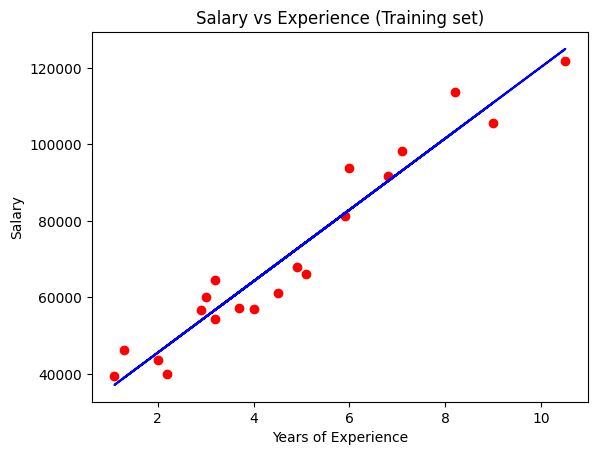

In [17]:
plt.scatter(X_train, y_train, color = 'red')   # Scatter plot of actual values of training set.
plt.plot(X_train, y_pred_train, color = 'blue')   # This plots our regression line. The regression line is the line of predictions coming as close as possible to the actual values. Here we have used plot() function to plot the linear curve.
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Red dots represent the actual values and the blue line is the regression line for the training set.
# The predicted values are the values that fall on the blue line for the values of the X_train.

## Visualising the Test set results

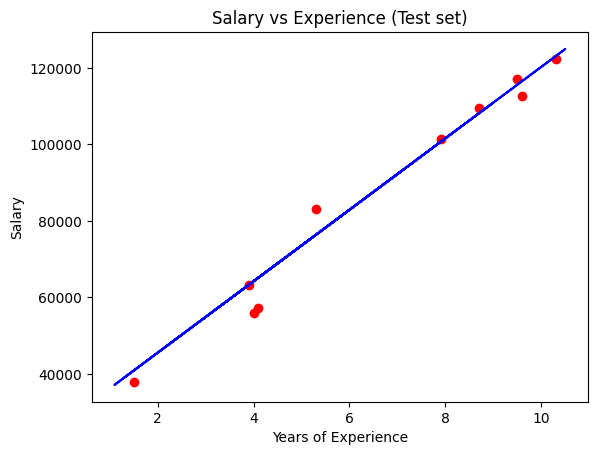

In [18]:
plt.scatter(X_test, y_test, color = 'red')   # Scatter plot of actual values of test set.
plt.plot(X_train, y_pred_train, color = 'blue')   # This will be the same line as above since this is the curve of our linear regression model. The regression line is resulting from an unique equation. Therefore the predicted values of the test set will be on the same regression line as predicted values of the training set. That is why do not replace train with test here for X and y. If you replace with test for X and y, you will get the same result, as it will work with the same b0 and b1 coefficients and plot the curve with the X_test and y_pred_test.
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# The blue line is the regression line obtained from the training of the linear regression model on the training set.
# The red dots are now the actual values of the test set.
# For the test set which is completely new observations to the model, the predicted values are the values that fall
# on the blue line for the values of the X_test.

# We see that, even for the new observations, the predicted salaries are very close to the actual salaries.
# So, our simple linear regression model works very well!!

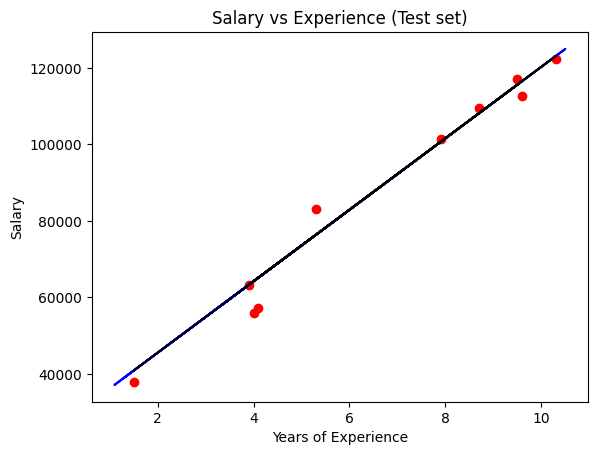

In [19]:
# Checking the regression line for train and test set.

plt.scatter(X_test, y_test, color = 'red')   # Scatter plot of actual values of test set.
plt.plot(X_train, y_pred_train, color = 'blue')   # This will be the same line as above since this is the curve of our linear regression model. The regression line is resulting from an unique equation. Therefore the predicted values of the test set will be on the same regression line as predicted values of the training set. That is why do not replace train with test here for X and y. If you replace with test for X and y, you will get the same result, as it will work with the same b0 and b1 coefficients and plot the curve with the X_test and y_pred_test.
plt.plot(X_test, y_pred_test, color = 'black')   # Plot of the same regression line (i.e., same b0 and b1 coefficients as obtained on training the model on the training set) but with predicted output with X_test.
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# You can see that the blue line and black lines fall exactly on each other. That is, while we train the regression
# model on the training set, it gives a unique line meaning the line has unique b0 and b1 values. Now, if we plot the
# regression line with X_test, the line's y-intercept and slope will not change, it will only for X_test. Hence we
# get the same regression line whether you plot with (X_train, y_pred_train) or (X_test, y_pred_test).

## Making a single prediction (for example the salary of an employee with 12 years of experience)

In [20]:
print(regressor.predict([[12]]))

[138967.5015615]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967,5.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

## Getting the final linear regression equation with the values of the coefficients

In [21]:
print(regressor.coef_)   # gives the slope of the regression line i.e., b1.
print(regressor.intercept_)   # gives the y-intercept of the regression line i.e., b0.

[9345.94244312]
26816.192244031183


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

## Calculation of Pearson correlation coefficient

Motivated by the class of Soumya Boral sir of Vidyastu Data Analytics course, we calcuate the Pearson correlation coefficient which is a measure of correlation strength for linear regression. This is given by,

$r = \frac{Cov(x, y)}{\sigma_x \sigma_y}$,

where, the covariance is given by,

$Cov(x, y) = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})$,

and $\sigma_x$ and $\sigma_y$ are standard deviations of $x$ and $y$, respectively.

The Pearson correlation coefficient, $r$ can take value between $-1$ and $+1$. When r is positive and close to $+1$, this means positive correlation which indicates as $x$ increases, $y$ also increases. When r is negative and close to $-1$, this means negative correlation which indicates as $x$ increases, $y$ decreases. When $r$ is close to 0, this means no linear correlation. Remember, $r$ is used to know correlation strength **only for linear correlation**, not for higher order correlations.

Putting $y = x$ above, Cov(x, x) = $\sigma_x^2$ and hence $r = 1$ for self correlation.

In [24]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [25]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [54]:
# Pearson correlation coefficient using np.corrcoef() function.

# The pear correlation coefficient can be calculated by np.corrcoef() function which expects two arrays of same shape
# of which it calculates linear correlation. In above, the feature X is a matrix or 2D array and the dependent variable vector
# y is a 1D array. So, we need to convert both into 2D array or 1D array. Here, we use flatten() function to reshape the
# 2D X array into a 1D array named X_reshaped.


X_reshaped = X.flatten()   # flatten() function convert multidimensional array into a 1D array. It does not change the original X array.
print(X_reshaped)

# Shape of both X_reshaped and y are same
print(X_reshaped.shape)
print(y.shape)

# Calculation of Pearson correlation coefficient
print(np.corrcoef(X_reshaped, y))

# It returns a matrix or 2D array showing the correlation coefficient between (X, X), (X, Y), (Y, X) and (Y, Y). Naturally, the correlation
# between itself is 1 and the correlation between X and y is 0.978 which is positive and very close to +1. So, here, the independent variable
# years of experience and dependent variable salary are strongly positively linearly correlated which indicates as x increases, y also
# increases linearly.

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
(30,)
(30,)
[[1.         0.97824162]
 [0.97824162 1.        ]]


In [57]:
# Pearson correlation coefficient using pearsonr() function of scipy.stats module.

from scipy.stats import pearsonr

print(pearsonr(X_reshaped, y))

# We get the same value as above. Fine.

PearsonRResult(statistic=0.9782416184887599, pvalue=1.1430681092271567e-20)
